# US & Europe covid-19 outbreak affect on gold prices





Abstract

If we grabbed the past 10 years of gold prices data, we may notice that on Nov 2015 the price of gold hit a record low of $1146 per ounce. Ever since then, prices have been growing at a relatively steady rate. In 2020 however, many experts are projecting an unusual fluctuating gold prices due to the unprecedented corona-virus outbreak which had a great impact on our economy.

hypothesis

Fall: In a simplified approach to understand the potential correlation between the increased numbers of covid-19 cases in the US and the price of gold, we will start off by taking a closer look at the drop of gold prices at the beginning stages of US covid-19 outbreak back in march. This was during the increased markets’ volatility driven by the fears. Nobody knew what was happening next and people mostly grabbed on their good old US dollar.

Rise: During this time of record low since Dec 2019, an opportunity may have opened up for short term gold investors which led to a reasonable recovery. Now, why did the price keep on rising ? Is it safe to say that the trillions of dollars that were dumped into the economy in early April held a big welcome sign for inflation. Did this raise concerns about the value of the dollar and caused the prices of gold to shoot back up?

Resources

- https://www.fxempire.com/forecasts/article/price-of-gold-fundamental-daily-forecast-rise-in-covid-19-cases-has-investors-betting-on-more-stimulus-657804

- https://www.macrotrends.net/1333/historical-gold-prices-100-year-chart


In [806]:
from pandas import DataFrame
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
import os
import urllib.request
import numpy as np


## Daily gold prices in respect to US new infections over the covid-19 pandamic period

In [807]:
# opening the web page using selenium

driver=webdriver.Chrome()
driver.get('https://www.usagold.com/reference/prices/goldhistory.php')

# extracting Gold prices

res = driver.execute_script("return document.documentElement.innerHTML;")
soup=BeautifulSoup(res,'lxml')

data = soup.find_all('td',{'class':'text'})




In [808]:
#assembling the dates with the corresponding prices 

#starting from jan 2020 until july 2020 or up to the time you are reading this 

date=[]

price=[]

k = False
for d in data:
    k = not k
    if not k:
        price.append(d.text)
        
j = False
for d in data:
    j = not j
    if  j:
        date.append(d.text)
        
#create a dataframe with 2 columns from the previous lists: 1) dates  2) prices 

data_tuples = list(zip(date,price))

gold_df=pd.DataFrame(data_tuples, columns=['date','price'])

#preparing the data by converting the date from string object to datetime pandas object

gold_df['date']= pd.to_datetime(gold_df['date'])

gold_df.sort_values(by=['date'], inplace=True)

gold_df=gold_df.reset_index()

gold_df=gold_df.drop(['index'], axis=1)

In [809]:
gold_df.tail()

,date,price
125,2020-06-25,1765.88
126,2020-06-26,1771.23
127,2020-06-29,1773.09
128,2020-06-30,1783.40
129,2020-07-01,1781.83


In [810]:
# This link is for a github repo in which the US daily covid19 new cases reports were found in csv format

url="https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

s=requests.get(url).content

covid_df=pd.read_csv(io.StringIO(s.decode('utf-8')))

# setting up a US new covid cases dataFrame in the proper format


In [811]:
covid_usa=covid_df.loc[covid_df['location']=='United States']

covid_usa= covid_usa[['date','new_cases']]

covid_usa=covid_usa.set_index('date')

covid_usa=covid_usa.reset_index()

covid_usa['date']= pd.to_datetime(covid_usa['date']) 

covid_usa.tail()



,date,new_cases
178,2020-06-26,40949.0
179,2020-06-27,45527.0
180,2020-06-28,42486.0
181,2020-06-29,38673.0
182,2020-06-30,41556.0


In [812]:
#Merging Gold prices df with US new cases df

US_graph_df=pd.merge_asof(gold_df,covid_usa, on='date', direction='backward')

US_graph_df['price'] = pd.to_numeric(US_graph_df['price'],errors='coerce')

In [813]:
US_graph_df.tail()


,date,price,new_cases
125,2020-06-25,1765.88,34339.0
126,2020-06-26,1771.23,40949.0
127,2020-06-29,1773.09,38673.0
128,2020-06-30,1783.40,41556.0
129,2020-07-01,1781.83,41556.0


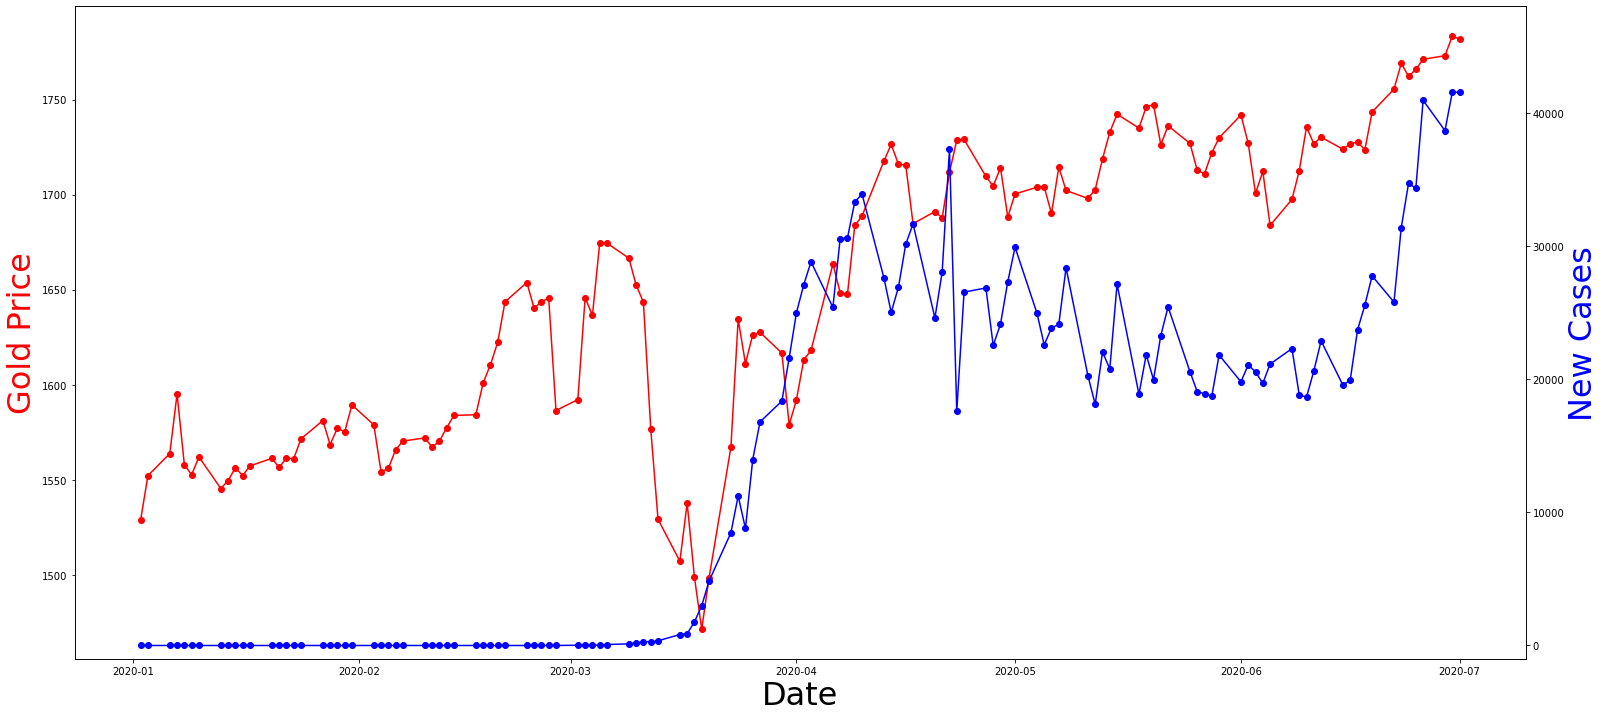

In [827]:
#create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(26,12))

# make a plot  
ax.plot(US_graph_df.date, US_graph_df['price'], color="red", marker="o")

# set x-axis label
ax.set_xlabel("Date",fontsize=32)
# set y-axis label
ax.set_ylabel("Gold Price",color="red",fontsize=32)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object

ax2.plot(US_graph_df.date, US_graph_df["new_cases"],color="blue",marker="o")

plt.ylim(-1000,48000)

ax2.set_ylabel("New Cases",color="blue",fontsize=32)

plt.show()


# Extras. .
#### Daily gold prices in respect to Europe new infections over the covid-19 pandamic period

In [815]:
# europe data was downloaded from a kaggle data set under the following link
#https://www.kaggle.com/imdevskp/corona-virus-report?select=covid_19_clean_complete.csv

cov = pd.read_csv("Desktop\global_covid19.csv",index_col=False)

global_=cov.copy()

# Setting up the data in the right format to be later merged with our gold prices df
europe_=global_.loc[global_['WHO Region']=='Europe']

europe_=europe_.groupby(['Date'])['Confirmed'].sum()

europe_df=europe_.to_frame()

europe_df=europe_df.reset_index()

europe_df=europe_df.set_index('Date')

europe_df=europe_df.reset_index()

europe_df['Date']= pd.to_datetime(europe_df['Date']) 

europe_df['date']=europe_df['Date']

europe_df=europe_df.drop(['Date'], axis=1)

europe_df.tail()


,Confirmed,date
154,2636968,2020-06-24
155,2656205,2020-06-25
156,2677063,2020-06-26
157,2693507,2020-06-27
158,2709718,2020-06-28


In [816]:
europe_graph_df=pd.merge_asof(gold_df,europe_df, on='date', direction='backward')

europe_graph_df['price'] = pd.to_numeric(europe_graph_df['price'],errors='coerce')

europe_graph_df['Confirmed'].fillna(0,inplace=True)

In [817]:
europe_graph_df.tail()

,date,price,Confirmed
125,2020-06-25,1765.88,2656205.0
126,2020-06-26,1771.23,2677063.0
127,2020-06-29,1773.09,2709718.0
128,2020-06-30,1783.40,2709718.0
129,2020-07-01,1781.83,2709718.0


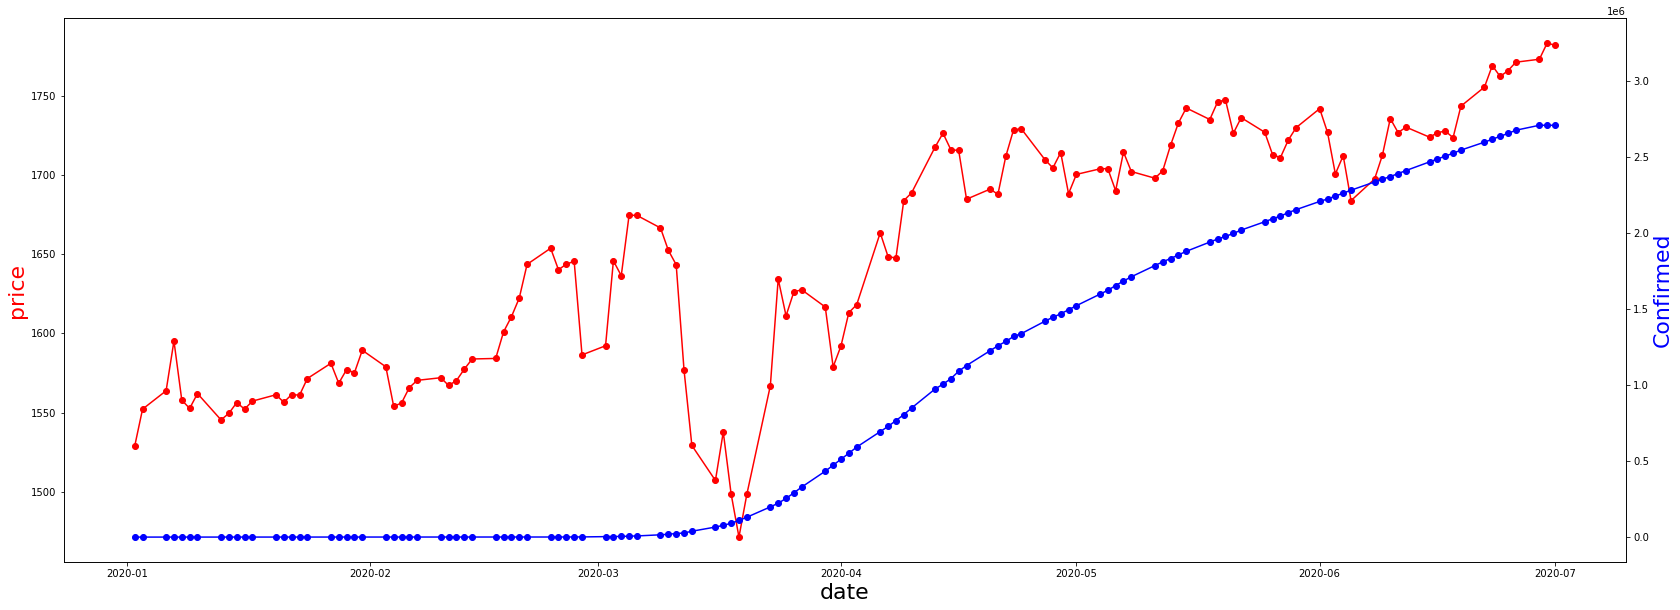

In [818]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(28,10))

# make a plot
ax.plot(europe_graph_df.date, europe_graph_df['price'], color="red", marker="o")

# set x-axis label
ax.set_xlabel("date",fontsize=22)
# set y-axis label
ax.set_ylabel("price",color="red",fontsize=22)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(europe_graph_df.date, europe_graph_df["Confirmed"],color="blue",marker="o")

ax2.set_ylabel("Confirmed",color="blue",fontsize=22)

scale_factor = 1.2

ymin, ymax = plt.ylim()

plt.ylim(ymin * scale_factor, ymax * scale_factor)

plt.show()
